In [6]:
# will need to run: pip install quandl
import pandas as pd
import numpy as np
import os
import quandl
import plotly.express as px
import plotly.graph_objects as go
import panel as pn
from panel.interact import interact
pn.extension("plotly")


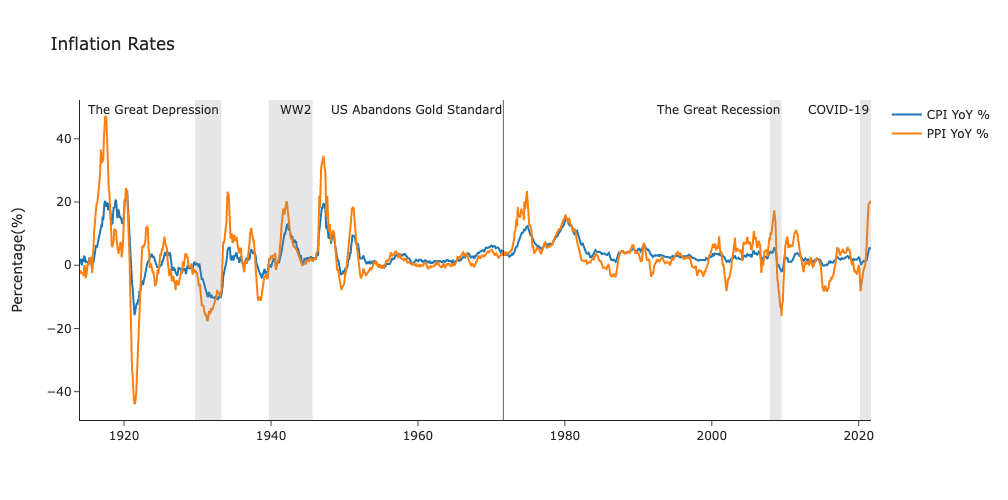

In [7]:
#import consumer price data from quandl API. 
CPI = quandl.get("RATEINF/CPI_USA")
PPI = quandl.get("FRED/PPIACO")

# Convert CPI/PPI into inflation rate. Calculates the change in CPI/PPI (compared to the same month in the prior year). For example: March 2021 Inflation Rate = (March 2021 CPI - March 2020 CPI)/March 2020 CPI
inflation_rate_cpi = (CPI - CPI.shift(12))/CPI.shift(12)
inflation_rate_cpi.index = inflation_rate_cpi.index.strftime('%Y-%m')
inflation_rate_cpi.index = pd.to_datetime(inflation_rate_cpi.index)
inflation_rate_ppi = (PPI - PPI.shift(12))/PPI.shift(12)

# Drop Nulls and set column headers
inflation_rate_cpi = inflation_rate_cpi.dropna()
inflation_rate_cpi.columns = ['Inflation Rate CPI']
inflation_rate_cpi['Inflation Rate CPI'] = inflation_rate_cpi['Inflation Rate CPI']*100
inflation_rate_ppi = inflation_rate_ppi.dropna()
inflation_rate_ppi.columns = ['Inflation Rate PPI']
inflation_rate_ppi['Inflation Rate PPI'] = inflation_rate_ppi['Inflation Rate PPI']*100

# Make a plotly graph_objects "Figure" and then add the inflation Rate Lines
inflation_rates_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Percentage(%)"), title = "Inflation Rates", height = 500)
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_cpi.index, y=inflation_rate_cpi["Inflation Rate CPI"],mode='lines', name="CPI YoY %"))
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_ppi.index, y=inflation_rate_ppi["Inflation Rate PPI"],mode='lines',name="PPI YoY %"))
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1971-08-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1971-09-01'][0], line_width=0, fillcolor="black", opacity=1, annotation_text = "US Abandons Gold Standard")

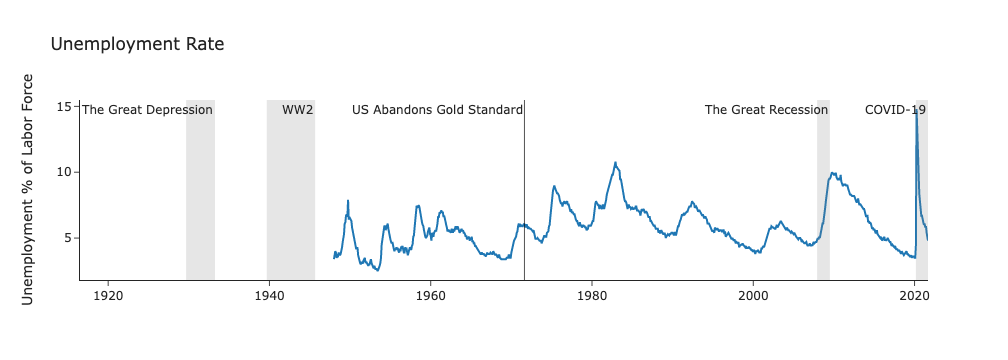

In [8]:
# Get Unemployment Rate Data and graph it
unemployment_rate = quandl.get("FRED/UNRATE", authtoken="m6nQZWVxbd6F2y_ESnBH")
unemployment_rate.columns = ["Unemployment Rate"]
unemployment_rate["Unemployment Rate"] = unemployment_rate["Unemployment Rate"]
unemployment_rate_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Unemployment % of Labor Force"), title = "Unemployment Rate")
unemployment_rate_chart.add_trace(go.Scatter(x= unemployment_rate.index, y=unemployment_rate["Unemployment Rate"],mode='lines', name="Unemployment Rate"))
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1971-08-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1971-09-01'][0], line_width=0, fillcolor="black", opacity=1, annotation_text = "US Abandons Gold Standard")

In [14]:
tab_1 = pn.Row(inflation_rates_chart)
tab_2 = pn.Row(unemployment_rate_chart)
tabs = pn.Tabs(
    ("Inflation",tab_1),
    ("Unemployment rate", tab_2 ),
    )
tabs
tabs.show()

Launching server at http://localhost:55182
